In [67]:
import pandas as pd
import numpy as np
import fugashi
import MeCab
# import nagisa
import fugashi
import sudachipy
from sudachipy import dictionary

In [68]:
from ipywidgets import Dropdown

language = r'Inglese'

options = [
    r'Inglese',
    r'Giapponese',
]

dropdown = Dropdown(options=options, description='Seleziona la lingua:', disabled = False)

def dropdown_handler(change):

    global language
    print(change.new)
    language = change.new  

dropdown.observe(dropdown_handler, names='value')
display(dropdown)

Dropdown(description='Seleziona la lingua:', options=('Inglese', 'Giapponese'), value='Inglese')

In [69]:
input('Premi start per continuare')

''

In [70]:
if language=='Inglese':
    df = pd.read_csv('english_news.csv', delimiter='\t', header=0) # lettura del file csv
else:
    df = pd.read_csv('japanese_news.csv', delimiter='\t', header=0) # lettura del file csv             
                                            
df # visualizzazione del file csv

,source,date,title,author,text
0,Mainichi Shimbun,2021-12-06,"Editorial: Japan govt's 20,000-yen handout mis...",NaN,The Japanese government is trying to boost the...
1,Mainichi Shimbun,2021-12-07,Editorial: Time for Japan PM Kishida to delive...,NaN,"Prime Minister Fumio Kishida, who won a public..."
2,Mainichi Shimbun,2021-12-08,"Editorial: 80 years on from Pearl Harbor, acti...",NaN,It has been 80 years since the start of the Pa...
3,Mainichi Shimbun,2021-12-08,"Yoroku: 80 years later, many lessons still not...",NaN,"""The world has changed completely. The era was..."
4,Mainichi Shimbun,2021-12-08,Promoting respect for human rights behind US '...,NaN,The U.S. administration under President Joe Bi...
...,...,...,...,...,...
36884,The Japan Times,2021-06-06,COVID-19 tracker: Tokyo reports 351 new cases ...,NaN,Tokyo confirmed 351 new cases of COVID-19 on S...
36885,The Japan Times,2021-06-07,Dollar weakens to around ¥109.40 in Tokyo,NaN,The dollar eased to around ¥109.40 in Tokyo tr...
36886,The Japan Times,2021-06-07,"Nikkei ends higher, but gains limited",NaN,The benchmark Nikkei average turned higher on ...
36887,The Japan Times,2021-06-07,COVID-19 tracker: Osaka reports 72 new cases b...,NaN,Osaka Prefecture reported 72 new COVID-19 case...


In [71]:
print(df.info()) # analizziamo il numero di null sulle colonne di nostro interesse (source e text)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36889 entries, 0 to 36888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36889 non-null  object
 1   date    36889 non-null  object
 2   title   36889 non-null  object
 3   author  12846 non-null  object
 4   text    36766 non-null  object
dtypes: object(5)
memory usage: 1.4+ MB
None


In [72]:
df = df.dropna(subset=['text']) # eliminiamo le righe con valore Null in occasione della feature text

print(df.info())
print(df.describe())

if language == 'Inglese':
    # Sistemiamo i testi mettendoli tutti in minuscolo e rimuovendo i caratteri speciali e di punteggiatura
    df['text'] = df['text'].apply(lambda x: x.lower()) 

    for char in [':', '.', ';', ',', '+', '-', '(', ')', '[', ']', '!', '?', '@', '$', '&', '#', '|', '^', '_', '-']:
        df['text'] = df['text'].apply(lambda x: x.replace(':', ''))

else:
    def tokenize_japanese_text(text):
        tokenizer_obj = dictionary.Dictionary().create()
        return [m.surface() for m in tokenizer_obj.tokenize(text)]

    # df['text'] = df['text'].apply(tokenize_japanese_text)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36766 entries, 0 to 36888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   source  36766 non-null  object
 1   date    36766 non-null  object
 2   title   36766 non-null  object
 3   author  12724 non-null  object
 4   text    36766 non-null  object
dtypes: object(5)
memory usage: 1.7+ MB
None
                 source        date               title         author  \
count             36766       36766               36766          12724   
unique                2        1495               35936           1316   
top     The Japan Times  2003-06-06  KANSAI: Who & What  Philip Brasor   
freq              36692          66                  23            318   

                                                     text  
count                                               36766  
unique                                              35932  
top     This could be due to a conflict with

C:\Users\giaco\AppData\Local\Temp\ipykernel_21792\1844291807.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.lower())
C:\Users\giaco\AppData\Local\Temp\ipykernel_21792\1844291807.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['text'] = df['text'].apply(lambda x: x.replace(':', ''))


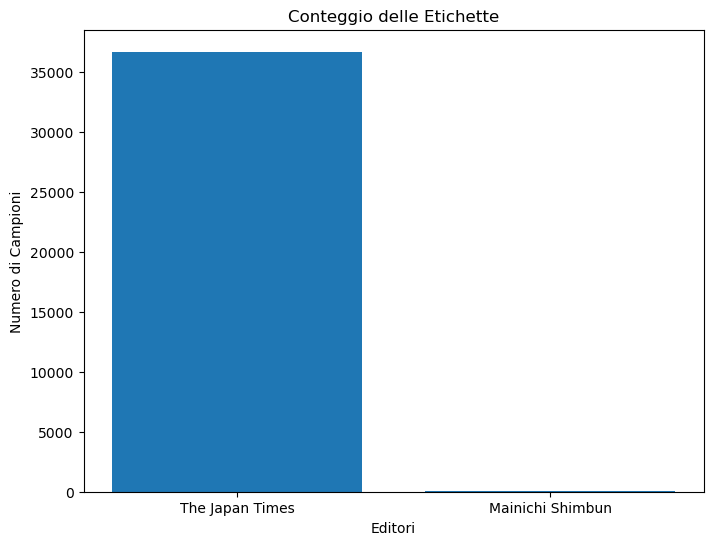

The Japan Times     36692
Mainichi Shimbun       74
Name: source, dtype: int64


In [73]:
# Visualizziamo graficamente le osservazioni per ogni label presente nel dataset (source)

import matplotlib.pyplot as plt

label_counts = df['source'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(label_counts.index, label_counts.values)
plt.xlabel('Editori')
plt.ylabel('Numero di Campioni')
plt.title('Conteggio delle Etichette')
plt.show()

print(label_counts)
# Il dataset è altamente sbilanciato

In [74]:
labels = np.unique(df['source'])

minority_class = df['source'].value_counts().min()

concatenated_training = []          
sampling_idx = np.array([])
for label in labels:
    sampling = df[df['source'] == label].sample(n=minority_class)
    concatenated_training.append(sampling)
    sampling_idx = np.append(sampling_idx, sampling.index)

df_validation = df.drop(sampling_idx.reshape(-1,))
df_final = pd.concat(concatenated_training, ignore_index=True)

In [75]:
df_final.describe()

,source,date,title,author,text
count,148,148,148,26,148
unique,2,131,148,23,148
top,Mainichi Shimbun,2021-12-08,News Navigator: What are the small modular nuk...,Eric Johnston,the mainichi shimbun answers some common quest...
freq,74,3,1,2,1


### SVM classifier

Accuracy: 1.00000


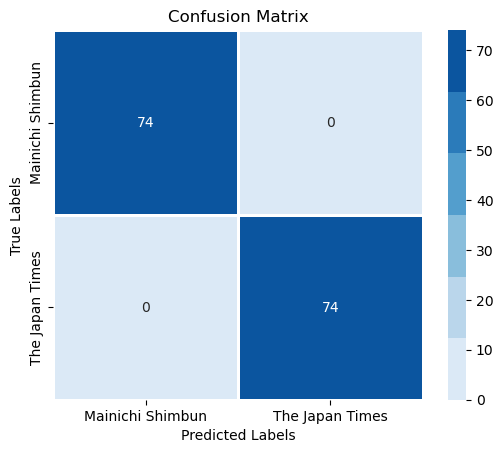

In [76]:
# nel momento in cui le classi, le etichette, sono solo due possiamo implementare una SVM come classificatore lineare

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# pre processiamo i testi convertendoli in vettori numerici
vectorizer = CountVectorizer()
# vectorizer = TfidfVectorizer(tokenizer=tokenize_japanese_text)
X = vectorizer.fit_transform(df_final['text'])

X_train = X
y_train = df_final['source']

svm_params = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

# Grid-Search
svm_model = SVC()
svm_grid = GridSearchCV(svm_model, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best_params = svm_grid.best_params_
svm_best_model = svm_grid.best_estimator_

# Training
svm_classifier = svm_best_model
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.99798


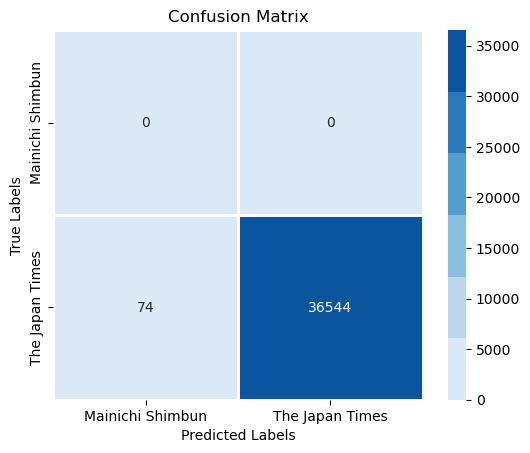

In [78]:
X_validation = df_validation['text']
Y_validation = df_validation['source']

X_validation = vectorizer.transform(X_validation)

# Predicting
y_pred_validation = svm_classifier.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [79]:
# NOTE: effettuare l'undersampling ha portato a un migliroamento della precisione sul Manichi Shimbun,\
#  con annessa riduzione di tempo computazionale

# NOTE 2: se ci fossero stati più dati si sarebbe anche potuta fare K-folds; i risultati sono già soddisfacenti così

# NOTE 3: il vectorizer una volta fittato, lo uso solo per trasformare il testo (solo funzione transform)

# NOTE 4: provare option della class weight di sklearn per svm nel caso di classi non bilanciate

# NOTE 5: kernel Poly scartato per bassa validation accuracy, RBF performa peggio del linear sugli validation, anche il sigmoid

### Decision tree

Accuracy: 1.00000


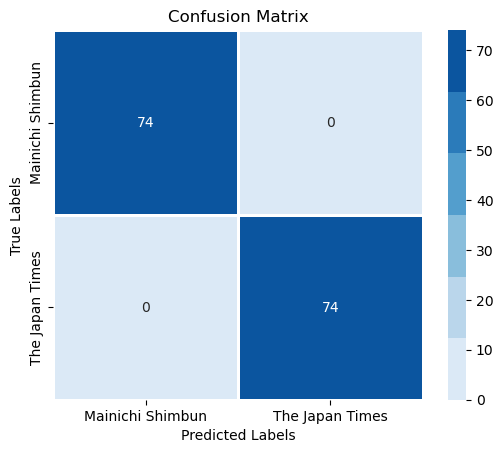

In [80]:
from sklearn.tree import DecisionTreeClassifier

tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

# Grid-Search
tree_model = DecisionTreeClassifier()
tree_grid = GridSearchCV(tree_model, tree_params, cv=5)
tree_grid.fit(X_train, y_train)
tree_best_params = tree_grid.best_params_
tree_best_model = tree_grid.best_estimator_

# Training
decision_tree = tree_best_model
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.99801


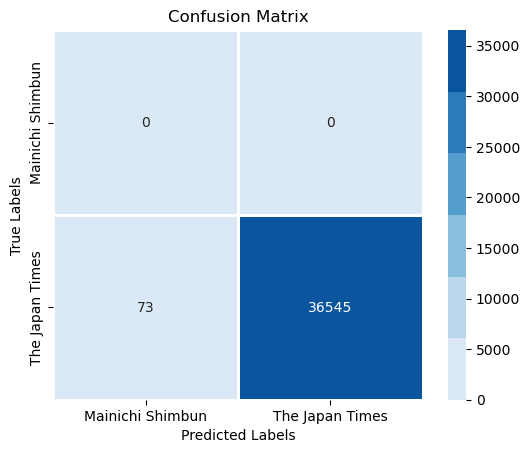

In [81]:
# Prediciting
y_pred_validation = decision_tree.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [82]:
# NOTE 1: aumento delle performance sugli validation anche se di poco

### Random forest

Accuracy: 1.00000


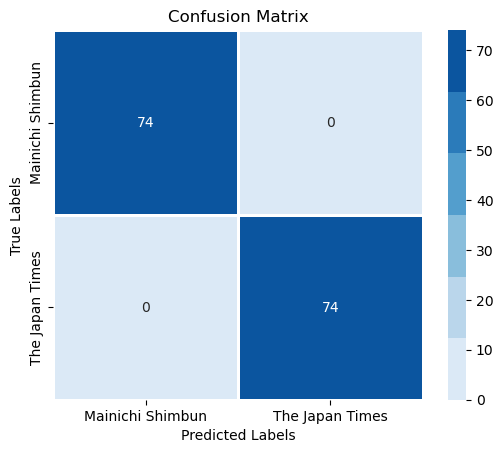

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

forest_params = {
    'n_estimators': [50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30]
}

# Grid-Search
forest_model = RandomForestClassifier()
forest_grid = GridSearchCV(forest_model, forest_params, cv=5)
forest_grid.fit(X_train, y_train)
forest_best_params = forest_grid.best_params_
forest_best_model = forest_grid.best_estimator_

# Training
random_forest = forest_best_model
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_train)

# Scoring
accuracy = accuracy_score(y_train, y_pred)
print(f"Accuracy: {accuracy:.5f}")


cm = confusion_matrix(y_train, y_pred)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Accuracy: 0.99801


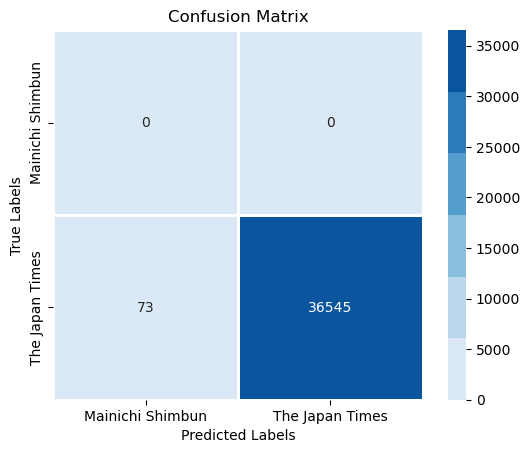

In [84]:
# Predicting
y_pred_validation = random_forest.predict(X_validation)

# Scoring
accuracy = accuracy_score(Y_validation, y_pred_validation)
print(f"Accuracy: {accuracy:.5f}")

cm = confusion_matrix(Y_validation, y_pred_validation)

import seaborn as sns
cmap = sns.color_palette("Blues")

sns.heatmap(cm, annot=True, cmap=cmap, fmt='d', linewidths=1, square=True,
            xticklabels=labels, yticklabels=labels)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()